In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = np.arange(0, 1, 0.02)
print(X[:3])
y = 0.66778 * X + 0.98761
print(y[:3])
print(len(X), len(y))

[0.   0.02 0.04]
[0.98761   1.0009656 1.0143212]
50 50


In [6]:
X

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

In [7]:
y

array([0.98761  , 1.0009656, 1.0143212, 1.0276768, 1.0410324, 1.054388 ,
       1.0677436, 1.0810992, 1.0944548, 1.1078104, 1.121166 , 1.1345216,
       1.1478772, 1.1612328, 1.1745884, 1.187944 , 1.2012996, 1.2146552,
       1.2280108, 1.2413664, 1.254722 , 1.2680776, 1.2814332, 1.2947888,
       1.3081444, 1.3215   , 1.3348556, 1.3482112, 1.3615668, 1.3749224,
       1.388278 , 1.4016336, 1.4149892, 1.4283448, 1.4417004, 1.455056 ,
       1.4684116, 1.4817672, 1.4951228, 1.5084784, 1.521834 , 1.5351896,
       1.5485452, 1.5619008, 1.5752564, 1.588612 , 1.6019676, 1.6153232,
       1.6286788, 1.6420344])

In [48]:
split

40

In [ ]:
split = int(len(X) * 0.8)
Xtrain, ytrain = X[:split], y[:split]
xtest, ytest = X[split:], y[split:]
print("legth of the xtrain ", len(Xtrain), "length of ytrain: ", len(ytrain))
print("legth of the xtest ", len(xtest), "length of ytest: ", len(ytest))

legth of the xtrain  40 length of ytrain:  40
legth of the xtest  10 length of ytest:  10


In [11]:
Xtrain

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78])

In [12]:
xtest

array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

In [8]:
split

40

In [ ]:
def plot_data(Xtrain=Xtrain, ytrain=ytrain, ytest=ytest, xtest=xtest, predictions=None):
    plt.scatter(Xtrain, ytrain, c="b", label="Training Data")
    plt.scatter(xtest, ytest, c="g", label="Testing data")
    if predictions is not None:
        plt.plot(xtest, predictions, c="r", label="predicted data")
    plt.title("X vs Y")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

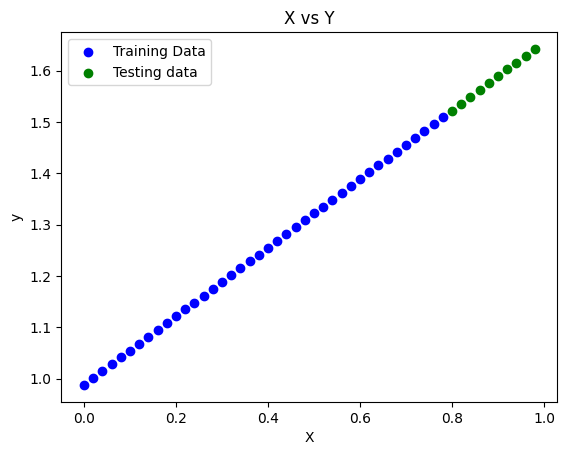

In [16]:
plot_data()

In [ ]:
# initialize weight and bias
weight = np.random.randn()
bias = np.random.randn()
print("the initial weight is :", weight, "and bias is ", bias)

the initial weight is : -0.7539777101101978 and bias is  -1.7124862623671826


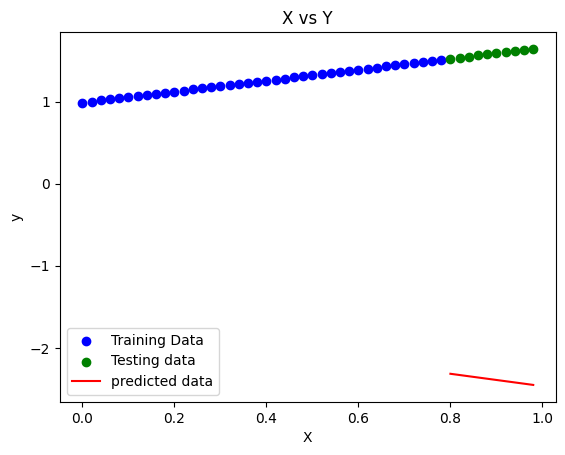

In [ ]:
ypred = xtest * weight + bias
plot_data(predictions=ypred)

In [ ]:
def loss_fn(ytrue, ypred):
    return np.sum(np.square(ytrue - ypred)) / len(ytrue)

In [ ]:
loss_fn(ytest, ypred)

np.float64(15.731548566845959)

In [43]:
alpha = 0.05
epochs = 500
train_loss_list = []
test_loss_list = []
for epoch in range(epochs):
    trainpred = Xtrain * weight + bias
    train_loss = loss_fn(ytrue=ytrain, ypred=trainpred)
    # compute the gradint
    gradientweight = (-2 / len(Xtrain)) * (np.sum((ytrain - trainpred)* Xtrain)) 
    gradientbias= (-2 / len(Xtrain)) * (np.sum((ytrain - trainpred)))
    #backward pass
    weight=weight-gradientweight*alpha
    bias=bias-gradientbias*alpha
    #testing data
    test_pred=xtest*weight+bias
    test_loss=loss_fn(ytrue=ytest,ypred=test_pred)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    if(epoch+1)%50==0:
        print(f"Ephocs: ",{epoch+1},"trainloss",train_loss,"test_loss",test_loss)
    

Ephocs:  {50} trainloss 9.613314415556194e-26 test_loss 4.170535289099505e-25
Ephocs:  {100} trainloss 6.068654589385636e-26 test_loss 2.6298673600594573e-25
Ephocs:  {150} trainloss 3.829915658098849e-26 test_loss 1.6607566190722953e-25
Ephocs:  {200} trainloss 2.4173598432393654e-26 test_loss 1.0477465653870818e-25
Ephocs:  {250} trainloss 1.5271654714745182e-26 test_loss 6.605384301867137e-26
Ephocs:  {300} trainloss 9.648773435911967e-27 test_loss 4.168548099175447e-26
Ephocs:  {350} trainloss 6.110304565473679e-27 test_loss 2.648028072085196e-26
Ephocs:  {400} trainloss 3.8577261173106795e-27 test_loss 1.6751786727491588e-26
Ephocs:  {450} trainloss 2.4460213169675826e-27 test_loss 1.0641038427758723e-26
Ephocs:  {500} trainloss 1.5526252484483069e-27 test_loss 6.732331250001762e-27


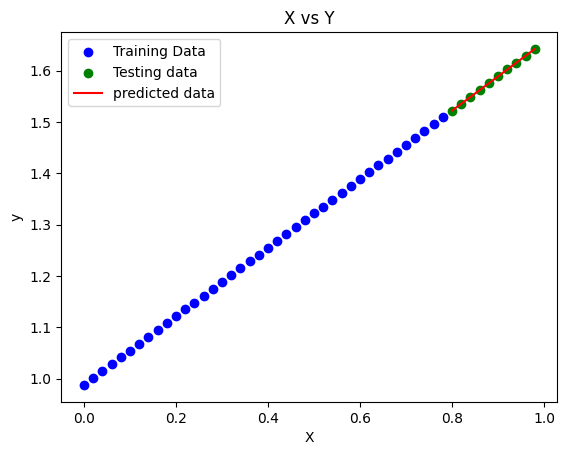

In [44]:
plot_data(predictions=test_pred)

In [46]:
weight,bias

(np.float64(0.6677799999998306), np.float64(0.9876100000000693))

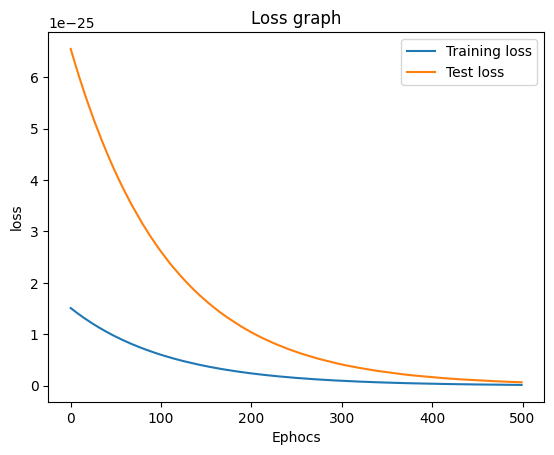

In [47]:
plt.plot(range(epochs),train_loss_list,label="Training loss")
plt.plot(range(epochs),test_loss_list,label="Test loss")
plt.title("Loss graph")
plt.xlabel("Ephocs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
# y = 0.66778 * X + 0.98761
# 